In [2]:
import pyreadstat

# Download data file from https://www.oecd.org/pisa/data/2018database/
df, meta = pyreadstat.read_file_multiprocessing(pyreadstat.read_sav, "CY07_MSU_TCH_QQQ.sav", num_processes=8, apply_value_formats=True)

In [3]:
import textwrap

question_columns = [
    # On average, how often do you do the following in this school?
    "TC046Q04NA",
    "TC046Q06NA",
    # Is your school’s capacity to provide instruction hindered by any of the following issues?
    "TC028Q05NA",
    "TC028Q06NA",
    # How often are you involved in the following reading activities?
    # "TC176Q05HA"
]

# question_labels = [meta.column_names_to_labels[col] for col in question_columns]
question_labels = [textwrap.fill(text, 100) for text in (
    "On average, how often do you exchange teaching materials with colleagues in this school?",
    "On average, how often do you work with other teachers in your school to ensure common standards in evaluations for assessing student progress?",
    "Is your school's capacity to provide instruction hindered by a lack of educational material (e.g. textbooks, IT equipment, library or laboratory material)?",
    "Is your school's capacity to provide instruction hindered by inadequate or poor quality educational material (e.g. textbooks, IT equipment, library or laboratory material)?",
)]
question_labels

['On average, how often do you exchange teaching materials with colleagues in this school?',
 'On average, how often do you work with other teachers in your school to ensure common standards in\nevaluations for assessing student progress?',
 "Is your school's capacity to provide instruction hindered by a lack of educational material (e.g.\ntextbooks, IT equipment, library or laboratory material)?",
 "Is your school's capacity to provide instruction hindered by inadequate or poor quality educational\nmaterial (e.g. textbooks, IT equipment, library or laboratory material)?"]

In [4]:
answer_labels = [
    [label for label in meta.variable_value_labels[question_column].values() if label != 'Valid Skip' and label != 'Not Applicable' and label != 'Invalid' and label != 'No Response']
    for question_column in question_columns
]
answer_labels

[['Never',
  'Once a year or less',
  '2-4 times a year',
  '5-10 times a year',
  '1-3 times a month',
  'Once a week or more'],
 ['Never',
  'Once a year or less',
  '2-4 times a year',
  '5-10 times a year',
  '1-3 times a month',
  'Once a week or more'],
 ['Not at all', 'Very little', 'To some extent', 'A lot'],
 ['Not at all', 'Very little', 'To some extent', 'A lot']]

In [5]:
df["CNTRYID"].nunique()

19

In [6]:
df[question_columns]

,TC046Q04NA,TC046Q06NA,TC028Q05NA,TC028Q06NA
0,Once a week or more,Once a week or more,To some extent,To some extent
1,Once a week or more,Once a week or more,Very little,Very little
2,1-3 times a month,Once a week or more,Not at all,To some extent
3,5-10 times a year,Once a week or more,A lot,A lot
4,Once a week or more,Once a week or more,Not at all,Not at all
...,...,...,...,...
107362,NaN,NaN,NaN,NaN
107363,NaN,NaN,NaN,NaN
107364,NaN,NaN,NaN,NaN
107365,2-4 times a year,2-4 times a year,Not at all,Not at all


In [7]:
import pandas as pd

grouped_df = df.groupby("CNTRYID")
question_dfs = []

for q_col in question_columns:
    question_dfs.append(grouped_df[q_col].value_counts().unstack())

df_questions = pd.concat(question_dfs, axis=1, keys=question_columns)
df_questions

TC046Q04NA                                     \
                     1-3 times a month 2-4 times a year 5-10 times a year   
CNTRYID                                                                     
Albania                            925              252               266   
Baku (Azerbaijan)                  434              136               113   
Brazil                             978             1203               718   
Chile                              585              457               349   
Chinese Taipei                     444              764               370   
Dominican Republic                 587              283               235   
Germany                            926              456               611   
Hong Kong                          433              549               411   
Korea                              427             1064               425   
Macao                              475              301               264   
Malaysia                           663              816               592   
Morocco                            388              466               293   
Panama                             407              384               257   
Peru                               800              694               397   
Portugal                           878              450               520   
Spain                             3394             2679              2288   
United Arab Emirates              1781              723               808   
United Kingdom                     294              107               112   
United States                      402              276               247   

                                                                    \
                     Never Once a week or more Once a year or less   
CNTRYID                                                              
Albania                 48                1108                 119   
Baku (Azerbaijan)       35                 592                  70   
Brazil                 677                 783                 873   
Chile                  183                 504                 313   
Chinese Taipei         134                 259                 520   
Dominican Republic      73                 607                 128   
Germany                 44                 664                 137   
Hong Kong               61                 258                 233   
Korea                  104                 227                 431   
Macao                   35                 497                 136   
Malaysia                81                 372                 289   
Morocco                221                 548                 326   
Panama                 241                 366                 299   
Peru                   435                 846                 522   
Portugal                74                 691                 198   
Spain                  754                2502                1611   
United Arab Emirates   265                3510                 386   
United Kingdom          20                 433                  39   
United States           66                 621                 150   

                            TC046Q06NA                                     \
                     1-3 times a month 2-4 times a year 5-10 times a year   
CNTRYID                                                                     
Albania                            908              143               261   
Baku (Azerbaijan)                  385              200               187   
Brazil                            1190             1105               807   
Chile                              561              415               346   
Chinese Taipei                     470              737               440   
Dominican Republic                 684              174               188   
Germany                            654              649               530   
Hong Kong             

In [8]:
norm_dfs = []

for q_col in question_columns:
    norm_dfs.append(df_questions[q_col].div(df_questions[q_col].sum(axis=1), axis=0))

df_questions_norm = pd.concat(norm_dfs, axis=1, keys=question_columns)
df_questions_norm

TC046Q04NA                                     \
                     1-3 times a month 2-4 times a year 5-10 times a year   
CNTRYID                                                                     
Albania                       0.340324         0.092715          0.097866   
Baku (Azerbaijan)             0.314493         0.098551          0.081884   
Brazil                        0.186927         0.229931          0.137232   
Chile                         0.244668         0.191133          0.145964   
Chinese Taipei                0.178242         0.306704          0.148535   
Dominican Republic            0.306848         0.147935          0.122844   
Germany                       0.326286         0.160677          0.215292   
Hong Kong                     0.222622         0.282262          0.211311   
Korea                         0.159447         0.397311          0.158701   
Macao                         0.278103         0.176230          0.154567   
Malaysia                      0.235691         0.290082          0.210451   
Morocco                       0.173060         0.207850          0.130687   
Panama                        0.208291         0.196520          0.131525   
Peru                          0.216567         0.187872          0.107472   
Portugal                      0.312344         0.160085          0.184988   
Spain                         0.256577         0.202525          0.172966   
United Arab Emirates          0.238325         0.096748          0.108123   
United Kingdom                0.292537         0.106468          0.111443   
United States                 0.228150         0.156640          0.140182   

                                                                        \
                         Never Once a week or more Once a year or less   
CNTRYID                                                                  
Albania               0.017660            0.407653            0.043782   
Baku (Azerbaijan)     0.025362            0.428986            0.050725   
Brazil                0.129396            0.149656            0.166858   
Chile                 0.076537            0.210790            0.130908   
Chinese Taipei        0.053794            0.103974            0.208752   
Dominican Republic    0.038160            0.317303            0.066911   
Germany               0.015504            0.233968            0.048273   
Hong Kong             0.031362            0.132648            0.119794   
Korea                 0.038835            0.084765            0.160941   
Macao                 0.020492            0.290984            0.079625   
Malaysia              0.028795            0.132243            0.102737   
Morocco               0.098573            0.244425            0.145406   
Panama                0.123337            0.187308            0.153019   
Peru                  0.117759            0.229020            0.141310   
Portugal              0.026325            0.245820            0.070438   
Spain                 0.057000            0.189144            0.121787   
United Arab Emirates  0.035461            0.469691            0.051653   
United Kingdom        0.019900            0.430846            0.038806   
United States         0.037457            0.352440            0.085131   

                            TC046Q06NA                                     \
                     1-3 times a month 2-4 times a year 5-10 times a year   
CNTRYID                                                                     
Albania                       0.334069         0.052612          0.096026   
Baku (Azerbaijan)             0.290128         0.150716          0.140919   
Brazil                        0.227664         0.211402          0.154391   
Chile                         0.234630         0.173568          0.144709   
Chinese Taipei                0.189059         0.296460          0.176991   
Dominican Republic            0.355694         0.090484          0.097764   
Germany    

<AxesSubplot:ylabel='CNTRYID'>

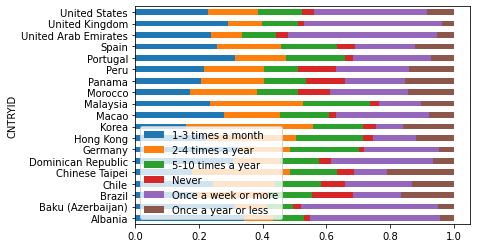

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_questions_norm[question_columns[0]].plot.barh(stacked=True)

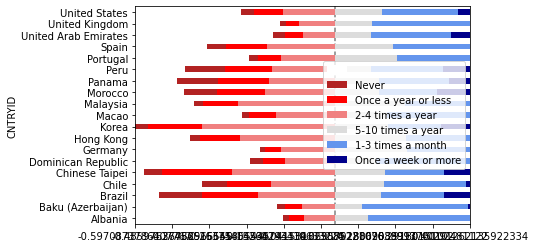

In [14]:
tmp = df_questions_norm[question_columns[0]][["Never", "Once a year or less", "2-4 times a year", "5-10 times a year", "1-3 times a month", "Once a week or more"]]
middles = tmp[["Never", "Once a year or less", "2-4 times a year"]].sum(axis=1)
longest = middles.max()

tmp.insert(0, '', (middles - longest).abs())

category_colors = ['white', 'firebrick', 'red', 'lightcoral','gainsboro','cornflowerblue', 'darkblue']

tmp.plot.barh(stacked=True, color=category_colors, edgecolor='none', legend=True)

z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, 1)
xvalues = np.linspace(0, 1, 10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.show()

In [19]:
import plot_likert

def plot_diverging_lickert(question_label, question_column, answer_labels):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    tmp1 = df_questions[question_column][answer_labels]
    tmp2 = df_questions_norm[question_column][answer_labels].multiply(100).round()
    # https://stackoverflow.com/questions/23142358/create-a-diverging-stacked-bar-chart-in-matplotlib/41384812#41384812
    category_colors = np.vstack(([1, 1, 1, 0], plt.get_cmap('coolwarm_r')(np.linspace(0.15, 0.85, len(answer_labels)))))

    plot_likert.plot_counts(tmp1, scale=answer_labels, colors=category_colors, legend=None, ax=ax1)
    plot_likert.plot_counts(tmp2, scale=answer_labels, colors=category_colors, legend=None, ax=ax2, compute_percentages=True)

    ax1.set_ylabel(None)
    ax2.set_ylabel(None)
    fig.suptitle(question_label, fontsize=16)

    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(
        handles=handles,
        labels=labels,
        ncol=len(answer_labels),
        fancybox=True,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.05),
        fontsize=11,
    )

    fig.tight_layout()
    plt.show()

c:\dev\python-3.10\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


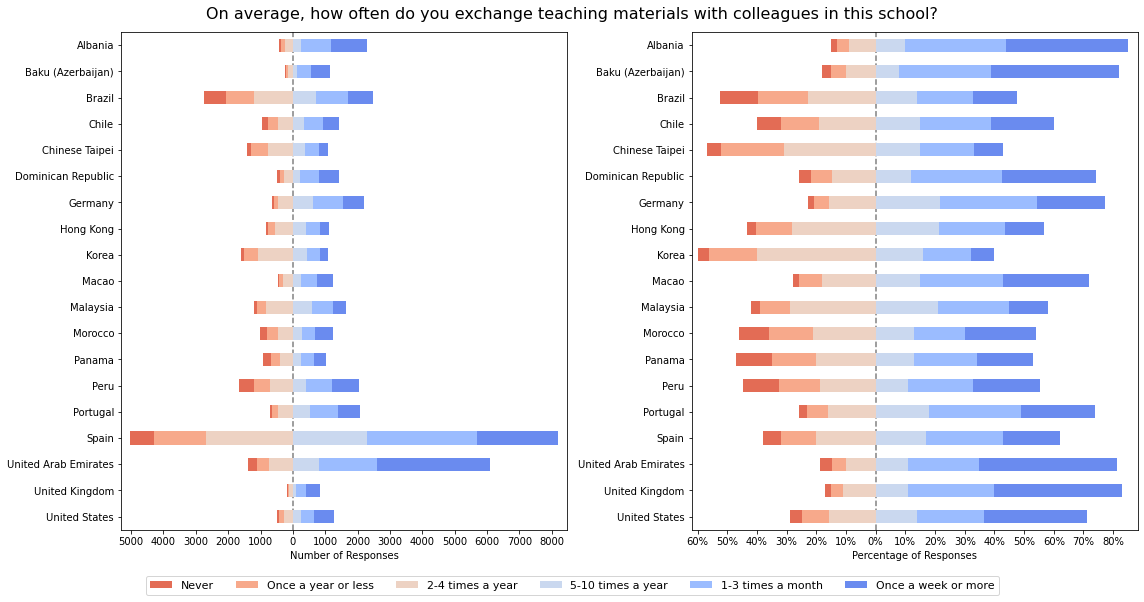

In [20]:
plot_diverging_lickert(question_labels[0], question_columns[0], answer_labels[0])

c:\dev\python-3.10\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


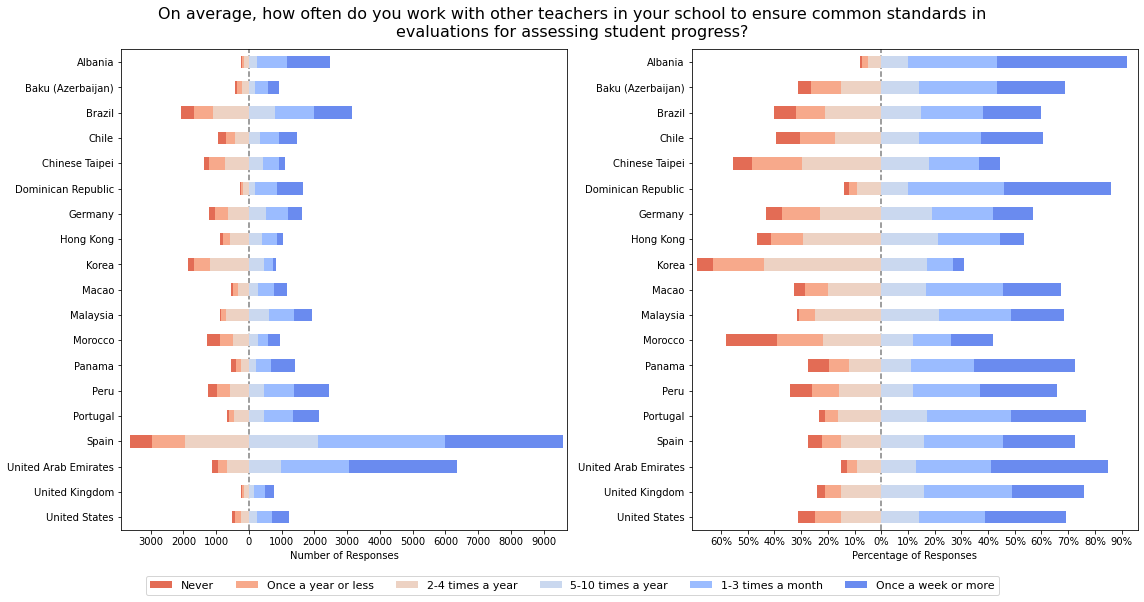

In [21]:
plot_diverging_lickert(question_labels[1], question_columns[1], answer_labels[1])

c:\dev\python-3.10\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


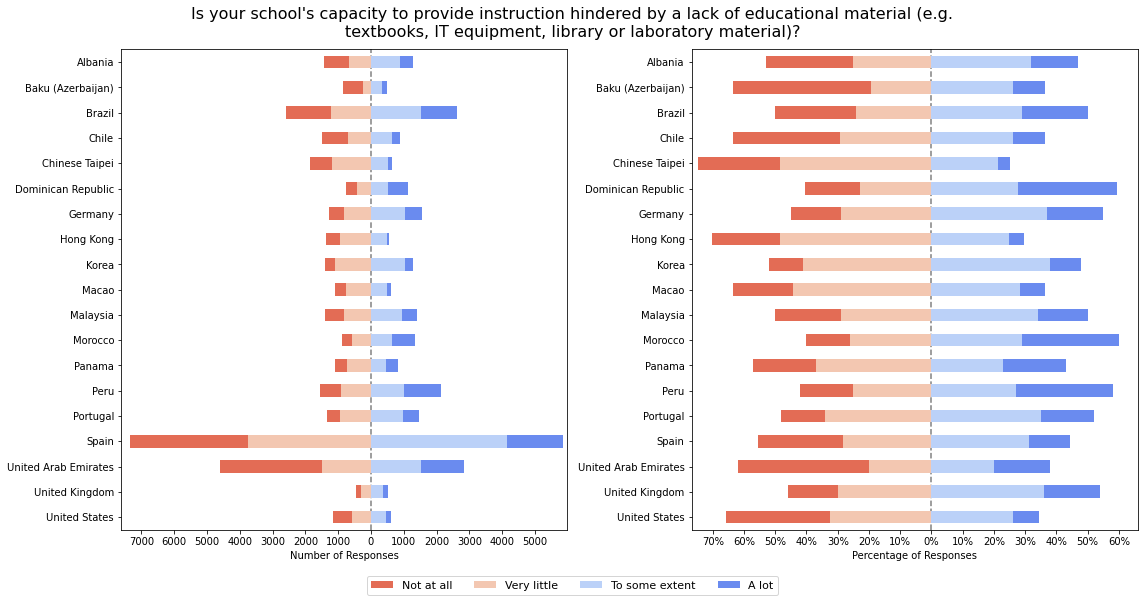

In [22]:
plot_diverging_lickert(question_labels[2], question_columns[2], answer_labels[2])

c:\dev\python-3.10\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


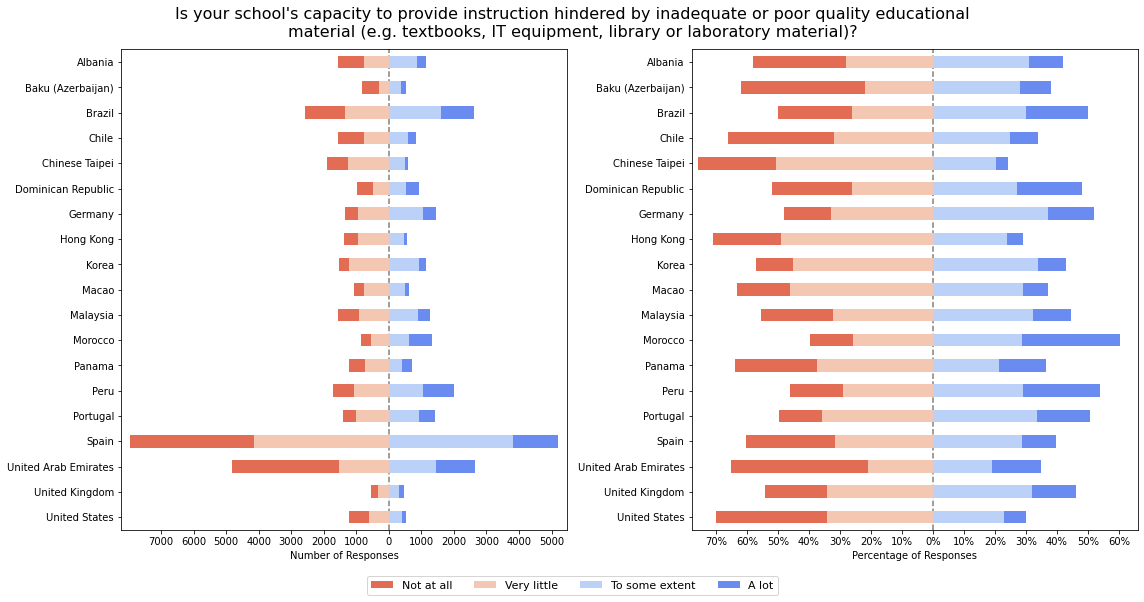

In [23]:
plot_diverging_lickert(question_labels[3], question_columns[3], answer_labels[3])